In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import plotly.express as px
# import plotly.io as pio
# template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/df_preprocessed.csv")
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,N,Spain,H,27,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,0.0,1
606653,N,Spain,H,56,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2013,9,2,1.0,1
606654,N,Spain,V,39,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1
606655,N,Spain,V,36,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606657 entries, 0 to 606656
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   emp_index                606657 non-null  object 
 1   cust_residence           606657 non-null  object 
 2   cust_gender              606657 non-null  object 
 3   age                      606657 non-null  int64  
 4   new_cust_index           606657 non-null  float64
 5   cust_seniority           606657 non-null  int64  
 6   indrel                   606657 non-null  float64
 7   cust_type                606657 non-null  float64
 8   cust_rel_time            606657 non-null  object 
 9   cust_res_index           606657 non-null  int64  
 10  is_foreign               606657 non-null  int64  
 11  channel_to_join          606657 non-null  object 
 12  deceased_index           606657 non-null  int64  
 13  name_province            606657 non-null  object 
 14  acti

In [4]:
import pickle
col_transformer = pickle.load(open('col_transformer.pkl', 'rb'))

In [5]:
df.columns

Index(['emp_index', 'cust_residence', 'cust_gender', 'age', 'new_cust_index',
       'cust_seniority', 'indrel', 'cust_type', 'cust_rel_time',
       'cust_res_index', 'is_foreign', 'channel_to_join', 'deceased_index',
       'name_province', 'activity_index', 'household_income', 'saving_acc',
       'guarantees', 'current_acc', 'derivada_acc', 'payroll_acc',
       'junior_acc', 'mass_particular_acc', 'particular_acc',
       'particular_plus_acc', 'short_term_deposit', 'medium_term_deposits',
       'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions1',
       'loans', 'taxes', 'credit_card', 'securities', 'home_account',
       'payroll', 'pensions2', 'direct_debit', 'first_holder_date_year',
       'first_holder_date_month', 'first_holder_date_day', 'total_accounts',
       'dup_rows_count'],
      dtype='object')

# Method 1
Applying kmeans without any dimensionality reduction.the column "dup_rows_count" will be used as sample weights when fitting the model.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

short_pipe = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed))
)

trnsf_df = short_pipe.fit_transform(df.drop("dup_rows_count", axis = 1))
trnsf_df

array([[-0.21106976, -5.19933758, -2.87784612, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.02512268, -5.19933758, -0.40880512, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.02512268, -5.19933758, -0.40880512, ..., -5.19933758,
        -5.19933758, -5.19933758],
       ...,
       [-0.04769168, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.17527843, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.09549215, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758]])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = trnsf_df
Y = df['dup_rows_count'].values

noDR_kmeans_clusters = kmeans.fit_predict(X, sample_weight = Y)

In [8]:
# Now, only for data visualization purpose, we will apply PCA on the dataset and visualize the clusters.
from sklearn.decomposition import PCA

pca = PCA(n_components = 3, random_state = seed)

red_dims = pca.fit_transform(trnsf_df)

new_df = pd.DataFrame({
    "PC1" : red_dims[:,0],
    "PC2" : red_dims[:,1],
    "PC3" : red_dims[:,2]
})

new_df['noDimRed_clusters'] = noDR_kmeans_clusters

new_df

,PC1,PC2,PC3,noDimRed_clusters
0,4.693122,9.352067,-6.172906,2
1,-9.669628,-8.084483,0.092799,3
2,-9.578410,-8.124393,0.081419,3
3,-9.734131,6.040841,6.886277,1
4,6.238325,-4.896521,-6.974035,0
...,...,...,...,...
606652,8.318310,9.663925,2.830572,2
606653,4.527971,9.308131,-6.058344,2
606654,12.479102,-4.428944,6.235098,4
606655,9.675347,-4.625363,-3.349686,0


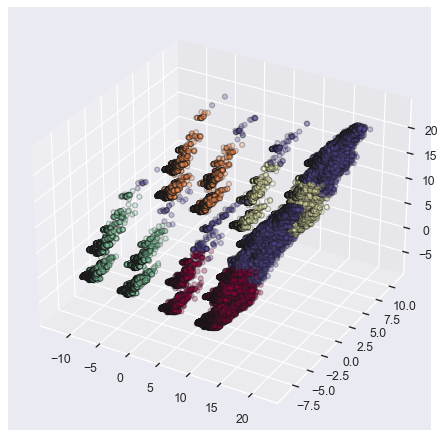

In [9]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['noDimRed_clusters'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

I will make a list to append the scores

In [10]:
models = []
db_score = []
sil_coef = []

In [11]:
#checking metrics

print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(trnsf_df, new_df['noDimRed_clusters']):.4f}")

print(f"""Silhouette Coeff Score: {metrics.silhouette_score(trnsf_df, 
                                                            new_df['noDimRed_clusters'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 1.3918
Silhouette Coeff Score: 0.3137


In [12]:
#saving the scores
models.append("no_DimRed_kmeans")
db_score.append(metrics.davies_bouldin_score(trnsf_df, new_df['noDimRed_clusters']))
sil_coef.append(metrics.silhouette_score(trnsf_df, new_df['noDimRed_clusters'], 
                                         sample_size = 30000, random_state = seed))

#### In general,the best model will have davies_bouldin_score closer to zero and silhouette_score closer to one. Lower the  davies_bouldin_score, the better. Higher the silhouette_score, the better.

#### In the next section, we will apply dimensionality reduction to the dataset in the form of PCA and try various clustering algorithms and compare their performances.

In [13]:
#First just checking how much PC will take to have the highest explained variance ratio.

transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(random_state = seed)) #not specifying number of components
)

transformer

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('onehotencoder-1',
                                  OneHotEncoder(top_categories=4,
                                                variables=['emp_index'])),
                                 ('onehotencoder-2',
                                  OneHotEncoder(variables=['cust_gender',
                                                           'cust_rel_time',
                                                           'cust_residence'])),
                                 ('countfrequencyencoder',
                                  CountFrequencyEncoder(encoding_method='frequency',
                                                        variables=['name_province',
                                                                   'channel_to_join']))])),
                ('quantiletransformer',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
           

In [14]:
arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))
print(arr.shape)
arr

(606657, 55)


array([[ 4.69312183e+00,  9.35206714e+00, -6.17291541e+00, ...,
         1.66963391e-15,  2.49847807e-14,  1.57859738e-13],
       [-9.66962841e+00, -8.08448286e+00,  9.28011725e-02, ...,
         1.97738488e-16,  1.74188430e-15,  3.36076062e-15],
       [-9.57840961e+00, -8.12439340e+00,  8.14187427e-02, ...,
        -3.64883544e-15, -2.79345675e-14, -5.70426461e-14],
       ...,
       [ 1.24791016e+01, -4.42894438e+00,  6.23509585e+00, ...,
        -7.89328821e-17,  2.12430784e-16, -5.50351330e-17],
       [ 9.67534715e+00, -4.62536306e+00, -3.34968628e+00, ...,
         2.01694016e-16, -2.51189936e-16,  2.92679382e-16],
       [ 6.75391679e+00,  9.69905007e+00, -3.23409992e+00, ...,
        -3.00685349e-17, -1.01457710e-16, -5.70382393e-16]])

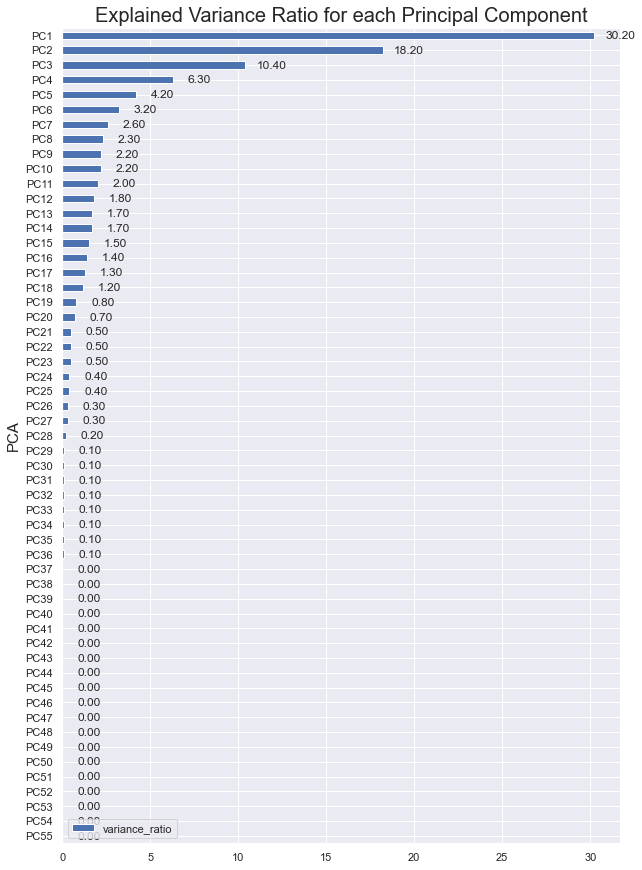

In [15]:
#plotting Principal Components and their explained variance ratio
per_var = np.round(transformer.named_steps.pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

pca_df = pd.DataFrame({
    "PCA" : labels,
    "variance_ratio" : per_var
}).set_index("PCA")

ax = pca_df.plot(kind = "barh", figsize = (10,15));

for p in ax.patches:
    width = p.get_width()
    plt.text(1.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.gca().invert_yaxis();
plt.title("Explained Variance Ratio for each Principal Component");

In [16]:
np.sum(transformer.named_steps.pca.explained_variance_ratio_[:2])

0.48339737404009897

Therefore, choosing the first 3 components.

In [17]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 5, random_state = seed))
)

arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))

arr_with_dup_counts = transformer.fit_transform(df) #which include cup row counts as some 
                                                    #clustering algorithms dont have sample_weight option.

reduced_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2],
})

reduced_df_with_dup = pd.DataFrame({
    "PC1" : arr_with_dup_counts[:,0],
    "PC2" : arr_with_dup_counts[:,1],
    "PC3" : arr_with_dup_counts[:,2],
})

In [18]:
reduced_df

,PC1,PC2,PC3
0,4.693122,9.352067,-6.172915
1,-9.669628,-8.084483,0.092800
2,-9.578410,-8.124393,0.081419
3,-9.734131,6.040841,6.886275
4,6.238325,-4.896522,-6.974034
...,...,...,...
606652,8.318310,9.663925,2.830572
606653,4.527971,9.308131,-6.058347
606654,12.479102,-4.428944,6.235096
606655,9.675347,-4.625363,-3.349687


In [19]:
reduced_df_with_dup

,PC1,PC2,PC3
0,4.693316,9.352094,-6.172686
1,-9.668650,-8.084998,0.093043
2,-9.577462,-8.124889,0.081624
3,-9.733258,6.040131,6.887014
4,6.183334,-4.879108,-6.994611
...,...,...,...
606652,8.318538,9.663999,2.830755
606653,4.528171,9.308151,-6.058116
606654,12.479484,-4.428624,6.234743
606655,9.675774,-4.625113,-3.349859


### Applying different clustering algorithms

## K-means

In [20]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)

X = reduced_df[["PC1", "PC2"]].values
Y = df['dup_rows_count'].values

kmeans_clusters = kmeans.fit_predict(X, sample_weight = Y)

reduced_df['kmeans_clusters'] = kmeans_clusters

Wall time: 5.27 s


In [21]:
import matplotlib.gridspec as gridspec

def plot_3d(x,col):
    fig = plt.figure(figsize=(15, 25))
    gs = gridspec.GridSpec(6, 4)

    #1st plot
    ax1 = fig.add_subplot(gs[0:2, 0:2], projection='3d')

    ax1.scatter3D(x['PC1'], x['PC2'], x['PC3'], 
                 c = x[col], alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

    #2nd plot
    ax2 = fig.add_subplot(gs[0:2,2:], projection='3d')

    ax2.scatter3D(x['PC2'], x['PC3'], x['PC1'], 
                 c = x[col], alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

    #3rd plot
    ax3 = fig.add_subplot(gs[2:4,1:3], projection='3d')

    ax3.scatter3D(x['PC3'], x['PC1'], x['PC2'], 
                 c = x[col], alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

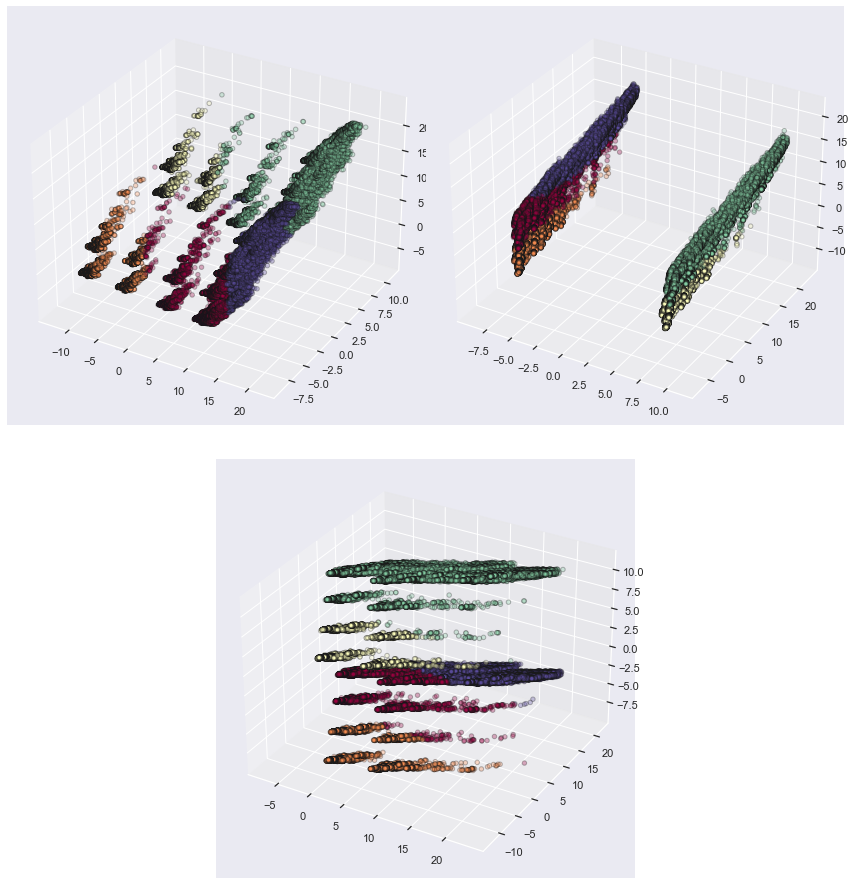

In [22]:
plot_3d(reduced_df, 'kmeans_clusters')

In [23]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df.iloc[:,:2], reduced_df['kmeans_clusters'])

sc = metrics.silhouette_score(reduced_df.iloc[:,:2], reduced_df['kmeans_clusters'], 
                              sample_size = 30000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
models.append("kmeans")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.3380
Silhouette Coeff Score: 0.7624


## MiniBatchKMeans

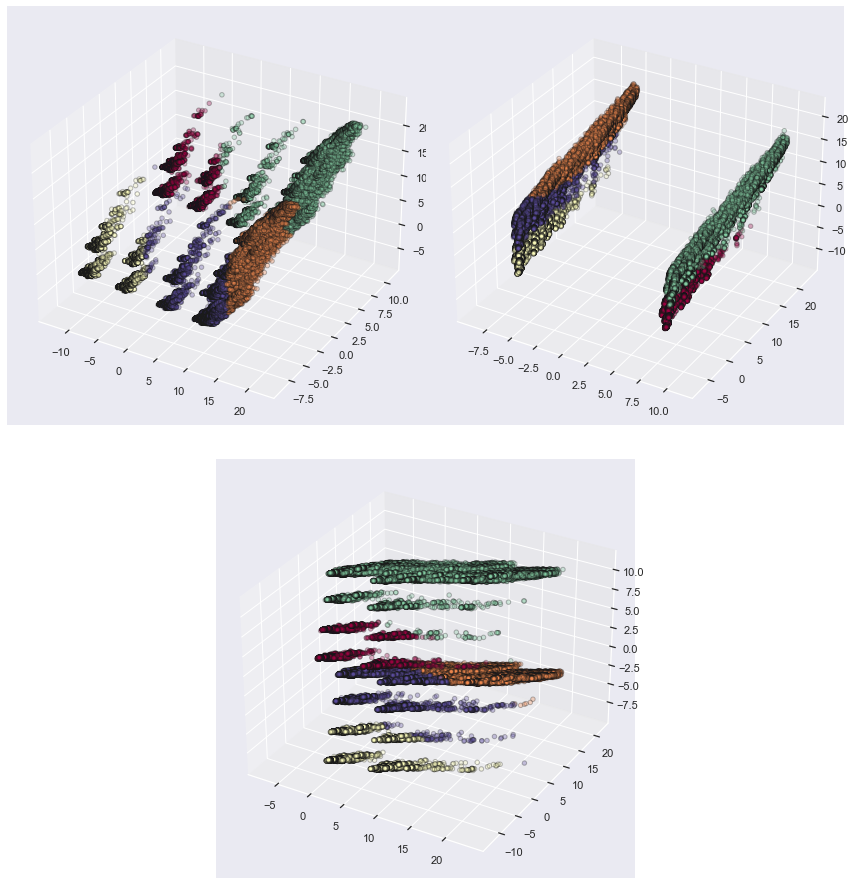

Wall time: 28.7 s


In [24]:
%%time
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=5, random_state=seed, max_iter=1000)

mb_kmeans_clusters =  mb_kmeans.fit_predict(X, sample_weight = Y)

reduced_df['mb_kmeans_clusters'] = mb_kmeans_clusters

plot_3d(reduced_df, 'mb_kmeans_clusters')

In [25]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df.iloc[:,:2], reduced_df['mb_kmeans_clusters'])

sc = metrics.silhouette_score(reduced_df.iloc[:,:2], reduced_df['mb_kmeans_clusters'], 
                              sample_size = 30000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
models.append("mini_batch_kmeans")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.3385
Silhouette Coeff Score: 0.7623


## GMM Algorithm

GaussianMixture does not have sample_weight parameter. Hence we will use all columns

In [26]:
%%time
from sklearn.mixture import GaussianMixture

parameters=['full','tied','diag','spherical']

results_ = pd.DataFrame(columns=['Covariance Type', 'Silhouette Score','Davies Bouldin Score'])

X_with_dup = reduced_df_with_dup[["PC1", "PC2"]].values


#Choosing the best covariance type
for i in parameters:
    gmm_cluster = GaussianMixture(n_components = 5, covariance_type = i, random_state = seed, 
                                  max_iter = 1000)
    
    clusters = gmm_cluster.fit_predict(X_with_dup)

    results_ = results_.append({
        "Covariance Type" : i, 
        
        "Silhouette Score" : metrics.silhouette_score(X_with_dup, 
                                                      clusters, 
                                                      sample_size = 30000, 
                                                      random_state = seed),
        
        'Davies Bouldin Score' : metrics.davies_bouldin_score(X_with_dup, clusters)
    }, ignore_index=True)

results_.sort_values("Silhouette Score", ascending=False)

Wall time: 1min 11s
Compiler : 928 ms


,Covariance Type,Silhouette Score,Davies Bouldin Score
1,tied,0.769004,0.304278
2,diag,0.767823,0.318775
0,full,0.767261,0.313648
3,spherical,0.761465,0.320722


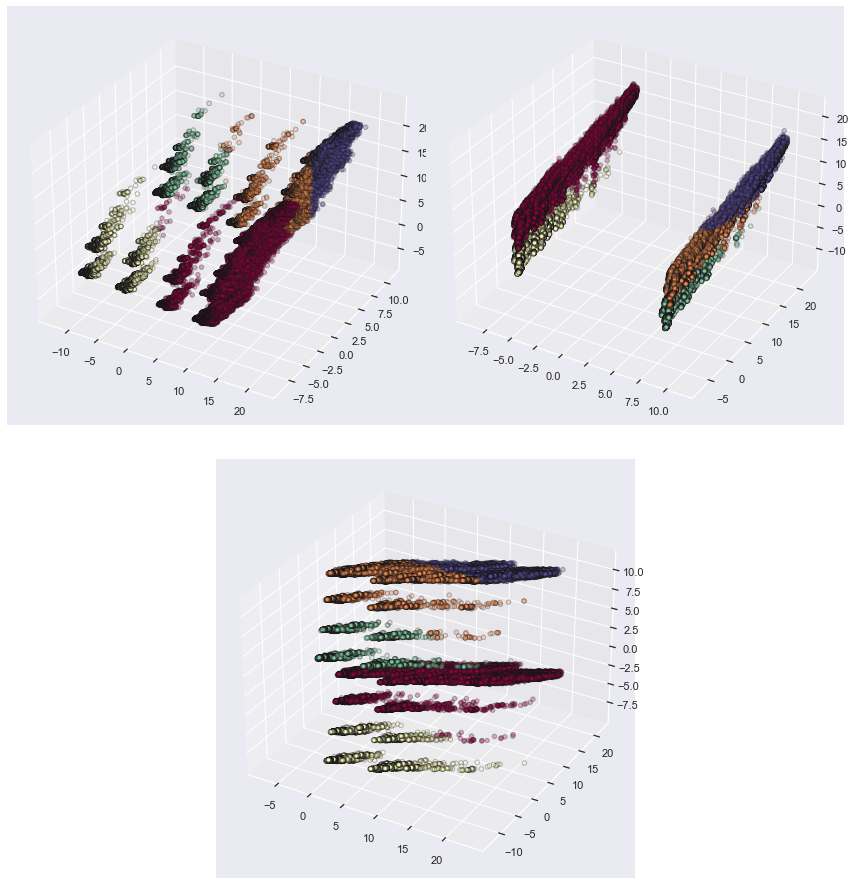

Wall time: 30.2 s


In [27]:
%%time
gmm = GaussianMixture(n_components=5, covariance_type = "tied", random_state = seed, max_iter = 1000)
gmm_clusters = gmm.fit_predict(X_with_dup)

reduced_df_with_dup['gmm_clusters'] = gmm_clusters

plot_3d(reduced_df_with_dup, 'gmm_clusters')

In [28]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['gmm_clusters'])

sc = metrics.silhouette_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['gmm_clusters'], 
                              sample_size = 30000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
models.append("GaussianMixture")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.3043
Silhouette Coeff Score: 0.7690


## fuzzy c means

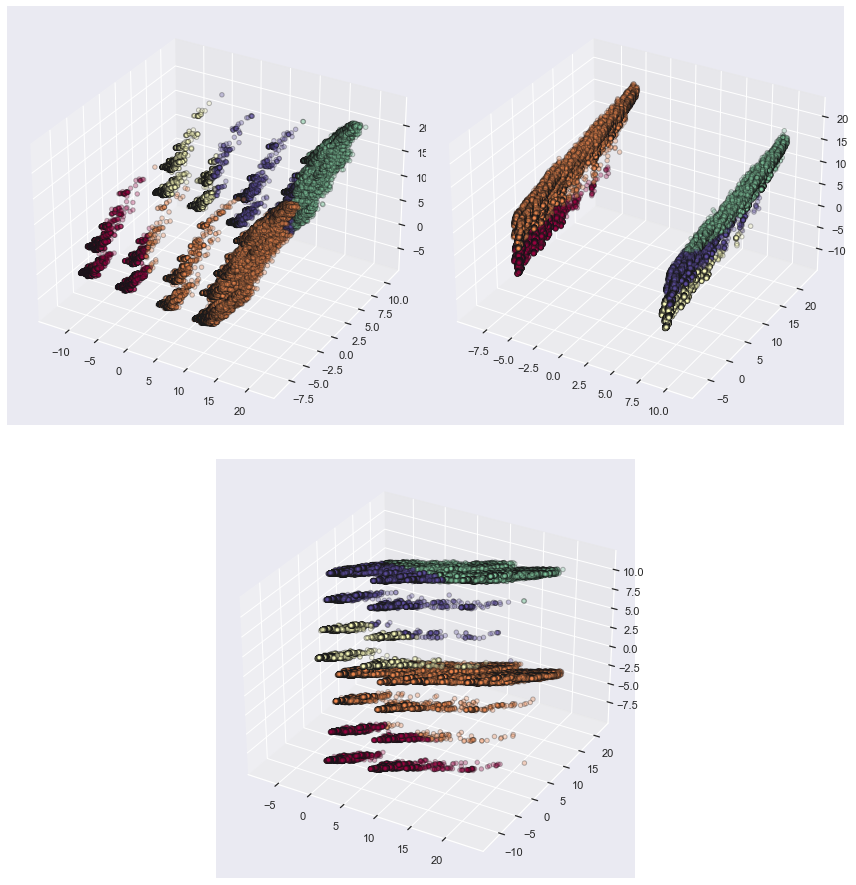

Wall time: 46.7 s


In [29]:
%%time
from fcmeans import FCM

fcm = FCM(n_clusters = 5, random_state = seed, max_iter = 1000)

fcm.fit(X_with_dup)
fcm_clusters = fcm.predict(X_with_dup)

reduced_df_with_dup['fcm_clusters'] = fcm_clusters

plot_3d(reduced_df_with_dup, 'fcm_clusters')

In [30]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['fcm_clusters'])

sc = metrics.silhouette_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['fcm_clusters'], 
                              sample_size = 30000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
models.append("FuzzyCMeans")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.3385
Silhouette Coeff Score: 0.7691


# Meanshift

In [31]:
%%time
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

est_bandwidth = estimate_bandwidth(X_with_dup, quantile=0.195, n_samples=30000)

mean_shift = MeanShift(bandwidth = est_bandwidth, bin_seeding=True)

meanshift_clusters = mean_shift.fit_predict(X_with_dup)

print(f"Number of estimated clusters : {len(np.unique(meanshift_clusters))}")

Number of estimated clusters : 5
Wall time: 37.9 s


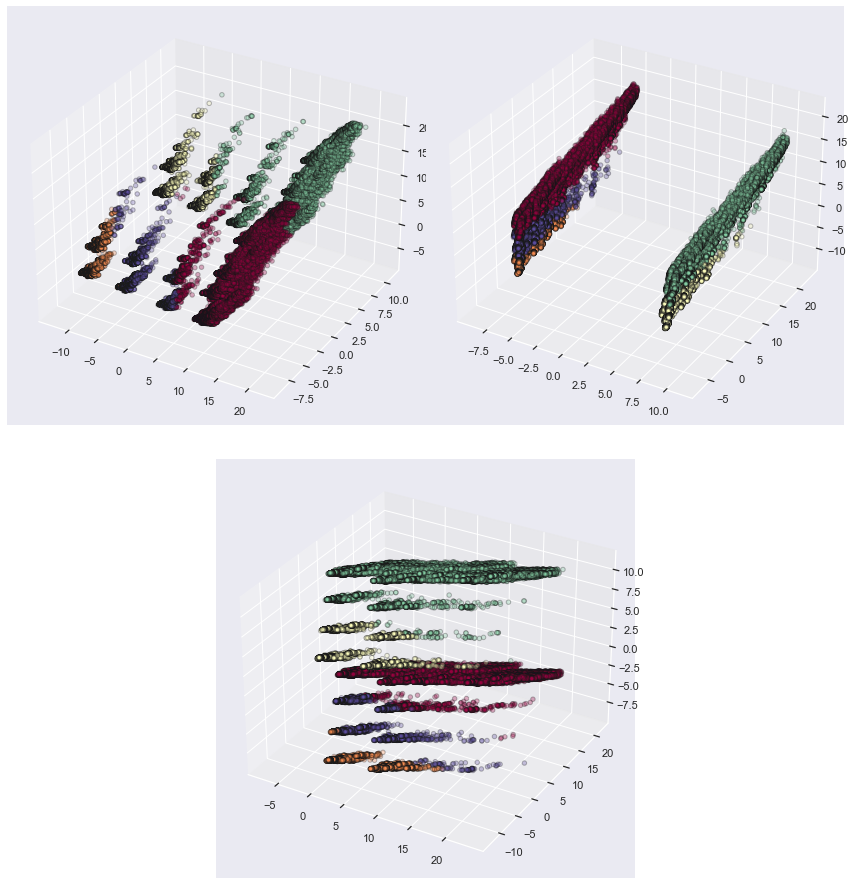

In [32]:
reduced_df_with_dup['meanshift_clusters'] = meanshift_clusters

plot_3d(reduced_df_with_dup, 'meanshift_clusters')

In [33]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['meanshift_clusters'])

sc = metrics.silhouette_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['meanshift_clusters'], 
                              sample_size = 30000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
models.append("MeanShift")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.4286
Silhouette Coeff Score: 0.7395


# Birch

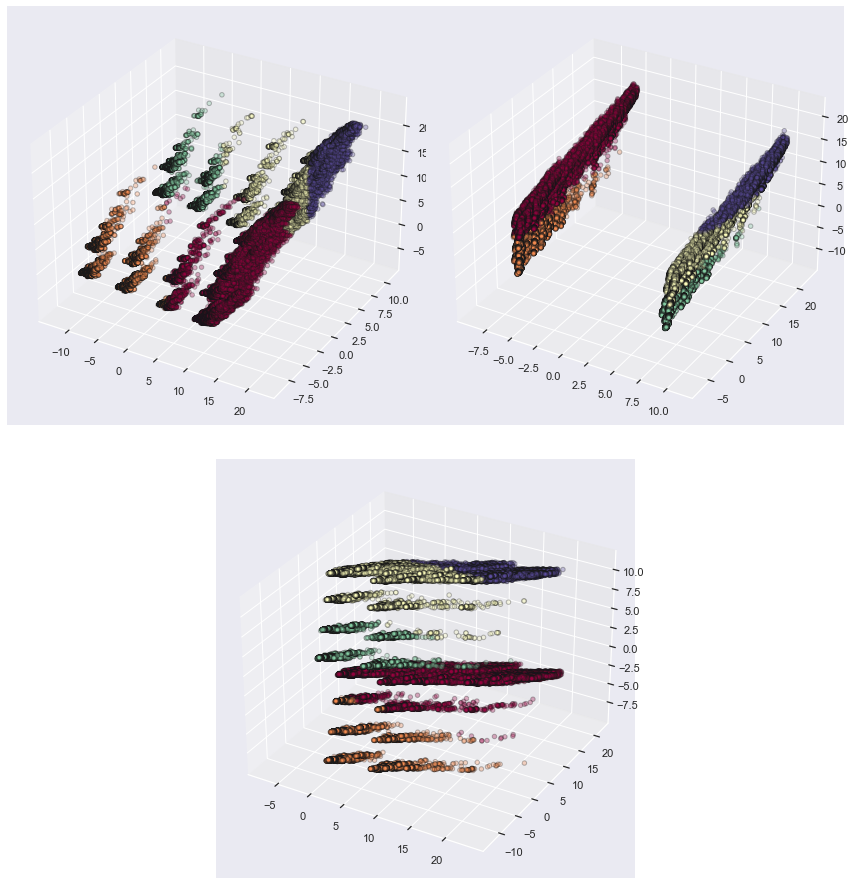

Wall time: 53.9 s


In [34]:
%%time
from sklearn.cluster import Birch

birch = Birch(n_clusters=5)

birch_clusters = birch.fit_predict(X_with_dup)

reduced_df_with_dup['birch_clusters'] = birch_clusters

plot_3d(reduced_df_with_dup, 'birch_clusters')

In [35]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['birch_clusters'])

sc = metrics.silhouette_score(reduced_df_with_dup.iloc[:,:2], reduced_df_with_dup['birch_clusters'], 
                              sample_size = 30000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
models.append("Birch")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.3142
Silhouette Coeff Score: 0.7624


# Comparison of clustering models

In [36]:
models

['no_DimRed_kmeans',
 'kmeans',
 'mini_batch_kmeans',
 'GaussianMixture',
 'FuzzyCMeans',
 'MeanShift',
 'Birch']

In [37]:
score_df = pd.DataFrame({
    "models" : models,
    "Davies-Bouldin_Score" : db_score,
    "Silhouette_Coeff_Score" : sil_coef
})

score_df.sort_values("Silhouette_Coeff_Score", ascending = False)

,models,Davies-Bouldin_Score,Silhouette_Coeff_Score
4,FuzzyCMeans,0.338473,0.769062
3,GaussianMixture,0.304278,0.769004
6,Birch,0.314207,0.762402
1,kmeans,0.337998,0.762359
2,mini_batch_kmeans,0.338462,0.762265
5,MeanShift,0.428559,0.739479
0,no_DimRed_kmeans,1.391827,0.313750


In [38]:
score_df.sort_values("Davies-Bouldin_Score")

,models,Davies-Bouldin_Score,Silhouette_Coeff_Score
3,GaussianMixture,0.304278,0.769004
6,Birch,0.314207,0.762402
1,kmeans,0.337998,0.762359
2,mini_batch_kmeans,0.338462,0.762265
4,FuzzyCMeans,0.338473,0.769062
5,MeanShift,0.428559,0.739479
0,no_DimRed_kmeans,1.391827,0.313750


Gaussian Mixture seems to have the overall better score. 